#  Домашнее задание №4

Задание 1.Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом.

Задание 2. Очистите текст от пунктуации, приведите его к нижнему регистру, лемматизируйте и запишите в новый файл. 

In [2]:
import re
import nltk
from nltk import WordNetLemmatizer
wnl = WordNetLemmatizer()
punctuacion = "\"#$%&()*+,-./:;<=!>?@[\]^_`{|}~„“«»†*—/"

# Выбираю текст, читаю текст, делю текст на слова. 
f =open ('C:\\Users\\Sveta\\Desktop\\imitation\\el_repositorio\\harry.txt', 'r', encoding = 'utf-8')
texto = f.read()
palabras = texto.split()

# Для "очищенных" слов.
solo_palabras = [] 

# От каждого слова оттделяю пунктуацю, привожу слова к нижнему регистру, леммтизирую.
# Записываю слова в список для "очищенных" слов.
for palabra in palabras:
    palabra_2 = palabra.strip(punctuacion)
    palabra_3 = palabra_2.lower()
    palabra_4 = wnl.lemmatize(palabra_3, pos = 'v')
    palabra_5 = wnl.lemmatize(palabra_4, pos = 'n')

    solo_palabras.append(palabra_5)
f.close()

# Открываю новый файл для записи. Записываю в него слова из списка через пробел. 
nf = open ('C:\\Users\\Sveta\\Desktop\\imitation\\el_repositorio\\harry_new.txt', 'w', encoding = 'utf-8')
nuevo_texto = ' '.join(solo_palabras)
nf.write(nuevo_texto)
nf.close()

Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота.

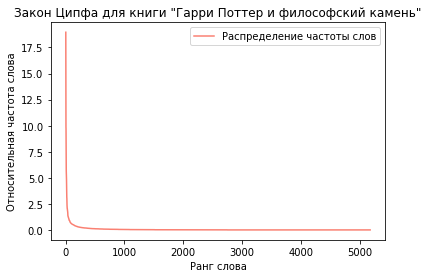

In [5]:
import re
import matplotlib
import matplotlib.pyplot as plt
from operator import itemgetter
from collections import Counter

diccionario = {} #Для пар слово-частота, как в Counter, но не в Counter
ox = {}          #Для пар слово-ранг
oy = {}          #Для пар слово-относительная_частота


#Выбираю текст, читаю текст, разбиваю на слова, считаю
f_3 = open('C:\\Users\\Sveta\\Desktop\\imitation\\el_repositorio\\harry_new.txt', 'r', encoding = 'utf-8')
el_texto = f_3.read()
palabras = el_texto.split()
counts = Counter(palabras)  

#Переношу ключи и значения из counter в другой словарь.
for key, value in counts.items():
	diccionario[key] = value

# Ключи из упорядоченного и развёрнутого словаря записываю в новый словарь для оси Х.
for palabra, numero in reversed(sorted(diccionario.items(), key = itemgetter(1))):
    if palabra in ox:
        pass
    else:
        ox[palabra] = 0

#Сопоставляю каждому ключу из словаря для оси Х его порядковый номер.  
ox = {key: rank for rank, key in enumerate(sorted(ox, key=ox.get), 1)}


# Ключи из упорядоченного и развёрнутого словаря записываю в новый словарь для оси Х.
# Но здесь сразу сопоставляю им абсолютную частоту, разделенную на общее количество лемм. 
for palabra, numero in reversed(sorted(diccionario.items(), key = itemgetter(1))):
    if palabra in oy:
        pass
    else:
        oy[palabra] = numero/len(Counter(diccionario.values()))

# Строю график: задаю значения точек на осях, цвет графика, легенду.
plt.plot(list(ox.values()), list(oy.values()), c='salmon', label="Распределение частоты слов")
plt.xlabel("Ранг слова")
plt.ylabel("Относительная частота слова")
plt.title('Закон Ципфа для книги "Гарри Поттер и философский камень"')
plt.legend()
plt.show()

Задание 3. Очистите текст от стоп-слов. Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

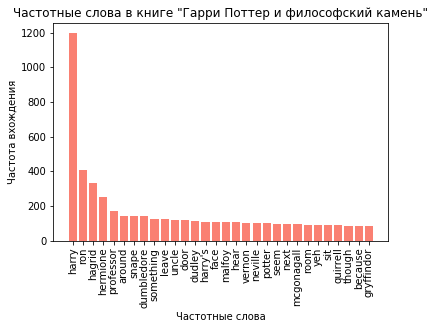

In [6]:
import re
import matplotlib
import matplotlib.pyplot as plt
from operator import itemgetter
from collections import Counter

# Открываю документ с лемматизированным файлом, читаю его и делю на слова.
f_4 = open('C:\\Users\\Sveta\\Desktop\\imitation\\el_repositorio\\harry_new.txt', 'r', encoding = 'utf-8')
el_texto = f_4.read()
palabras = el_texto.split()

#Открываю документ со списком из 250 стоп-слов, читаю его и делю на слова.
f_5 = open('C:\\Users\\Sveta\\Desktop\\imitation\\el_repositorio\\stop_words.txt', 'r', encoding = 'utf-8')
la_lista = f_5.read()
stop_palabras = la_lista.split()

#Создаю список для слов, которые не стоп-слова.
new_palabras = []

#Записываю в этот список только те слова из файла, которые не стоп-слова.
for palabra in palabras:
    if palabra in stop_palabras:
        pass
    else:
        new_palabras.append(palabra)

#Считаю слова, записываю слова в новый словарь как Counter, но не Counter
counts = Counter(new_palabras)
diccionario = {}
for key, value in counts.items():
    diccionario[key] = value

#Сортирую и разворачиваю полученный словарь
diccionario_2 = dict(reversed(sorted(diccionario.items(), key = itemgetter(1))))

#Задаю значения делений для ох, это числа в списке натуральных чисел до 30
x = []
for i in range(0,30):
    x.append(i)

# Строю диаграмму: задаю деления для осей, подписываю, как мне надо
# Задаю названия диаграммы и большие подписи к осям 
plt.bar(x, list(diccionario_2.values())[0:30], color='salmon')  
plt.xticks(x, list(diccionario_2.keys()), rotation=90) 
plt.title('Частотные слова в книге "Гарри Поттер и философский камень"')
plt.xlabel("Частотные слова")
plt.ylabel("Частота вхождения")
plt.show()